In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout 

train_dir = './data/train'
test_dir = './data/test'

In [10]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [11]:
index_to_folder = {0: "0", 1: "1", 2: "2", 3:"A", 4:"B", 5:"C", 6:"D", 7:"E", 8:"F", 9:"G", 10:"H", 11:"I"}

In [4]:
train_data = train_datagen.flow_from_directory(train_dir,
                              target_size=(300,300),
                              batch_size=32,
                              color_mode='grayscale',
                              class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                            target_size=(300,300),
                            batch_size=32,
                            color_mode='grayscale',
                            class_mode='categorical')

Found 4459 images belonging to 12 classes.
Found 1489 images belonging to 12 classes.


In [6]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_data, 
                    epochs=25,
                    steps_per_epoch=3000//train_data.batch_size,
                    validation_data=test_data, 
                    validation_steps=1000//test_data.batch_size)

Epoch 1/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.6575 - loss: 1.0044 - val_accuracy: 0.8317 - val_loss: 0.4976
Epoch 2/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.6684 - loss: 0.9391 - val_accuracy: 0.8410 - val_loss: 0.4473
Epoch 3/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 442s 5s/step - accuracy: 0.7174 - loss: 0.7945 - val_accuracy: 0.8538 - val_loss: 0.4267
Epoch 4/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 440s 5s/step - accuracy: 0.7448 - loss: 0.7375 - val_accuracy: 0.8652 - val_loss: 0.3912
Epoch 5/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 1371s 15s/step - accuracy: 0.7263 - loss: 0.7863 - val_accuracy: 0.8730 - val_loss: 0.3475
Epoch 6/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 723s 8s/step - accuracy: 0.7556 - loss: 0.6858 - val_accuracy: 0.8732 - val_loss: 0.3759
Epoch 7/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.7566 - loss: 0.7302 - val_accuracy: 0.9123 - val_loss: 0.3024
Epoch 8/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.7560 - loss: 0.7408 - val_accuracy: 0.9014 -

In [13]:
model.save('./newmodel.h5')

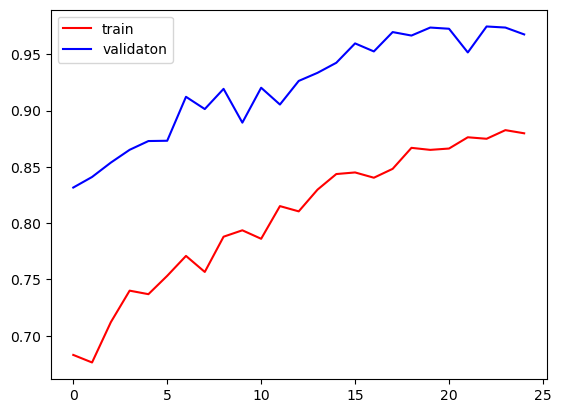

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validaton')
plt.legend()
plt.show()

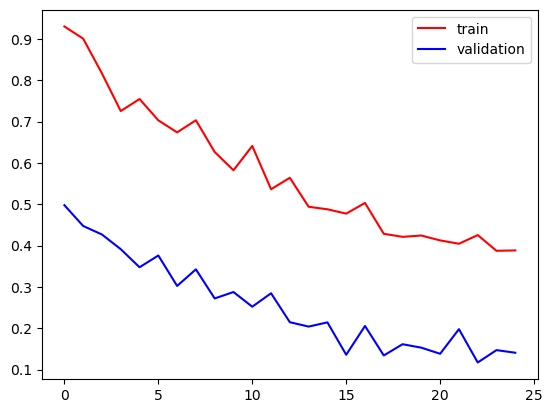

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

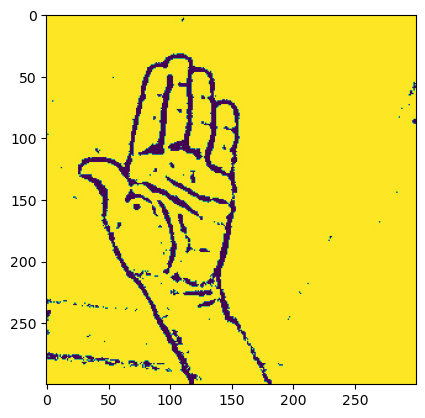

In [32]:
# Import the necessary libraries
import os
import random

# Specify the folder in Google Drive where the images are stored
img_folder = './Shuffled/'

# Get a list of all the image files in the folder
img_files = [f for f in os.listdir(img_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Select a random image file from the list
rand_img = random.choice(img_files)

# Load the image file using matplotlib's imread function
img = plt.imread(os.path.join(img_folder, rand_img))

# Display the image using matplotlib's imshow function
plt.imshow(img)

# Show the plot
plt.show()

In [33]:
img.shape

img = img.reshape(1, 300, 300, 1)
img = img.astype('float32') / 255

img.shape

(1, 300, 300, 1)

In [34]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


array([[1.0310501e-23, 2.1173754e-10, 1.6860159e-16, 2.0941461e-24,
        4.0045999e-21, 6.6700734e-17, 2.7293182e-35, 1.8750494e-22,
        8.6105414e-24, 9.9999928e-01, 3.0871555e-30, 7.4270480e-07]],
      dtype=float32)

In [35]:
predicted_class_index = np.argmax(model.predict(img), axis=1)
predicted_class_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([9], dtype=int64)

In [36]:
predicted_class_index = int(predicted_class_index)
predicted_folder = index_to_folder[predicted_class_index]
print(f"The predicted folder is: {predicted_folder}")

The predicted folder is: G


C:\Users\pande\AppData\Local\Temp\ipykernel_32692\2147429463.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_index = int(predicted_class_index)


In [41]:
cm = confusion_matrix(test_labels, np.array(pred_labels))
recall = np.diag(cm) / np.sum(cm, axis=1)

NameError: name 'test_labels' is not defined